# Restaurant Food Cost Problem

## 1.Problem Definition
> we have the dataset with the information about the restaurants we have to predict the food cost 


## 2. Data
> * we have the two datasets downloaded from : https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

* Training set : 12690 records
* Testing set : 4231 records


## 3.Evaluation

> if our model gives less error metrics we will continuew with this project


## 4. Features

* 1. Title : The feature of the restaursant which can help identify what and for whom it is suitable for
* 2. Restaurant ID : The uunique Id given for each restaurant
* 3. Cuisines : The variety of cuisines that the restaurant offers
* 4. Time : The open hours of the restaurant
* 5. City : The city in which th restaurant is located
* 6. Locality : The locality of the restaurant
* 7. Rating : The average rating of the restaurant
* 8. Votes : The overall votes received buy th restaurant
* 9. Cost : The average cost of two personal meals

# Getting tools ready

In [45]:
#Lets import the visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

#importing the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
df_train = pd.read_excel('Data-Train.xlsx')
df_test = pd.read_excel('Data-Test.xlsx')

In [3]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [7]:
df_train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

# Exploratory Data Analysis

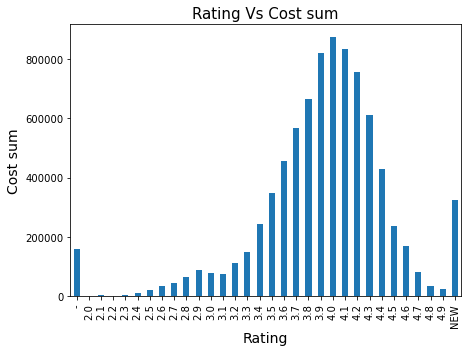

In [8]:
plt.figure(figsize = (7, 5))
df_train.groupby('RATING')['COST'].sum().plot(kind = 'bar')
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Cost sum', fontsize = 14)
plt.title('Rating Vs Cost sum', fontsize = 15);

In [9]:
df_train['CITY'].value_counts()

Chennai                2174
Bangalore              2149
Hyderabad              1819
Mumbai                 1722
New Delhi              1321
                       ... 
Marathahalli              1
Mumbai Andheri East       1
Chennai- 600107           1
Dilsukhnagar              1
Vadapalani                1
Name: CITY, Length: 359, dtype: int64

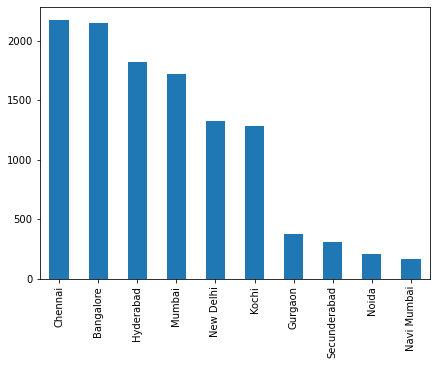

In [10]:
plt.figure(figsize = (7, 5))
Cities = df_train['CITY'].value_counts()[:10]
Cities.plot.bar();

In [11]:
df_train[df_train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [12]:
df_train[df_train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [13]:
df_train[df_train['CITY'] == 'Hyderabad']['COST'].mean()

595.1786695986806

In [14]:
df_train['RATING'] = df_train['RATING'].astype('object')
df_test['RATING'] = df_test['RATING'].astype('object')

In [15]:
df_train['RATING'].replace({'-' : 0.0, 'NEW' : 5.0}, inplace = True)
df_test['RATING'].replace({'-': 0.0 , 'NEW' : 5.0}, inplace = True)

In [16]:
df_train['RATING'] = df_train['RATING'].astype(float)
df_test['RATING'] = df_test['RATING'].astype(float)

In [17]:
df_train.describe()

,RESTAURANT_ID,RATING,COST
count,12690.000000,12688.000000,12690.000000
mean,7759.134121,3.705446,655.252246
std,4504.874150,0.892285,627.003540
min,0.000000,0.000000,20.000000
25%,3863.250000,3.500000,300.000000
50%,7740.000000,3.800000,500.000000
75%,11688.750000,4.100000,800.000000
max,15573.000000,5.000000,14000.000000


In [18]:
df_test.describe()

,RESTAURANT_ID,RATING
count,4231.000000,4229.000000
mean,7791.438431,3.687515
std,4458.797621,0.915524
min,3.000000,0.000000
25%,3908.500000,3.500000
50%,7798.000000,3.800000
75%,11634.000000,4.100000
max,15572.000000,5.000000


# Joining data

In [19]:
df_train['Source'] = 'Train'
df_test['Source'] = 'Test'

In [20]:
df = pd.concat([df_train, df_test], ignore_index = True)
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Train


In [21]:
## Making 'VOTES' feature clean
df['VOTES'] = df['VOTES'].str.rstrip('votes')
df['VOTES'] = df['VOTES'].astype(float)

In [22]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
Source              0
dtype: int64

In [23]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Train


## Lets  fill the missing values

In [24]:
df['VOTES'].fillna(df['VOTES'].median(), inplace = True)
df['RATING'].fillna(df['RATING'].median(), inplace = True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace = True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)

In [25]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
Source              0
dtype: int64

# Feature Engineering

In [26]:
df['Title_rat'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].mean())
df['Title_rat_count'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].count())
df['Title_rat_sum'] = df['TITLE'].map(df.groupby('TITLE')['RATING'].sum())

df['City_rat'] = df['CITY'].map(df.groupby('CITY')['RATING'].mean())
df['City_rat_count'] = df['CITY'].map(df.groupby('CITY')['RATING'].count())
df['City_rat_sum'] = df['CITY'].map(df.groupby('CITY')['RATING'].sum())

df['Cuisines_rat'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].mean())
df['Cuisines_rat_count'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].count())
df['Cuisines_rat_sum'] = df['CUISINES'].map(df.groupby('CUISINES')['RATING'].sum())

df['Rat_Vot'] = df['RATING'] * df['VOTES']

In [27]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source,Title_rat,Title_rat_count,Title_rat_sum,City_rat,City_rat_count,City_rat_sum,Cuisines_rat,Cuisines_rat_count,Cuisines_rat_sum,Rat_Vot
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Train,3.651487,4910,17928.8,4.155932,118,490.4,3.600000,1,3.6,176.4
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Train,4.098920,463,1897.8,3.655796,3002,10974.7,4.200000,1,4.2,126.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Train,3.651487,4910,17928.8,3.655796,3002,10974.7,3.650000,4,14.6,839.8
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Train,3.589670,5634,20224.2,4.019818,2311,9289.8,4.066667,3,12.2,98.4
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Train,3.717717,508,1888.6,4.019818,2311,9289.8,3.479487,117,407.1,627.0


## CONVERTING THE FEATURES TO NUMERICAL

In [31]:
le = LabelEncoder()
for cols in df.columns:
    if not pd.api.types.is_numeric_dtype(cols):
        df[cols] = le.fit_transform(df[cols])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TITLE               16921 non-null  int32
 1   RESTAURANT_ID       16921 non-null  int64
 2   CUISINES            16921 non-null  int32
 3   TIME                16921 non-null  int32
 4   CITY                16921 non-null  int32
 5   LOCALITY            16921 non-null  int32
 6   RATING              16921 non-null  int64
 7   VOTES               16921 non-null  int64
 8   COST                16921 non-null  int64
 9   Source              16921 non-null  int32
 10  Title_rat           16921 non-null  int64
 11  Title_rat_count     16921 non-null  int64
 12  Title_rat_sum       16921 non-null  int64
 13  City_rat            16921 non-null  int64
 14  City_rat_count      16921 non-null  int64
 15  City_rat_sum        16921 non-null  int64
 16  Cuisines_rat        16921 non-null  int6

In [35]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source,Title_rat,Title_rat_count,Title_rat_sum,City_rat,City_rat_count,City_rat_sum,Cuisines_rat,Cuisines_rat_count,Cuisines_rat_sum,Rat_Vot
0,34,9438,3294,898,400,328,17,46,36,1,32,52,102,79,22,91,157,0,15,538
1,36,13198,364,2301,75,1214,23,27,43,1,72,48,99,40,33,101,386,0,21,366
2,34,10915,3729,806,75,1272,19,218,28,1,32,52,102,40,33,101,175,3,155,2280
3,104,6346,5156,340,277,161,22,21,28,1,26,53,103,64,30,100,354,2,118,275
4,55,15387,2218,750,277,709,19,162,14,1,38,49,98,64,30,100,116,58,484,1822


## Splitting the train and test data

In [36]:
Train = df.loc[df['Source'] == 1]
Test = df.loc[df['Source'] == 0]

In [37]:
print(Train.shape),  print(Test.shape)

(12690, 20)
(4231, 20)


(None, None)

In [38]:
Train.drop('Source', axis = 1, inplace = True)
Test.drop(['Source','COST'], axis = 1, inplace = True)

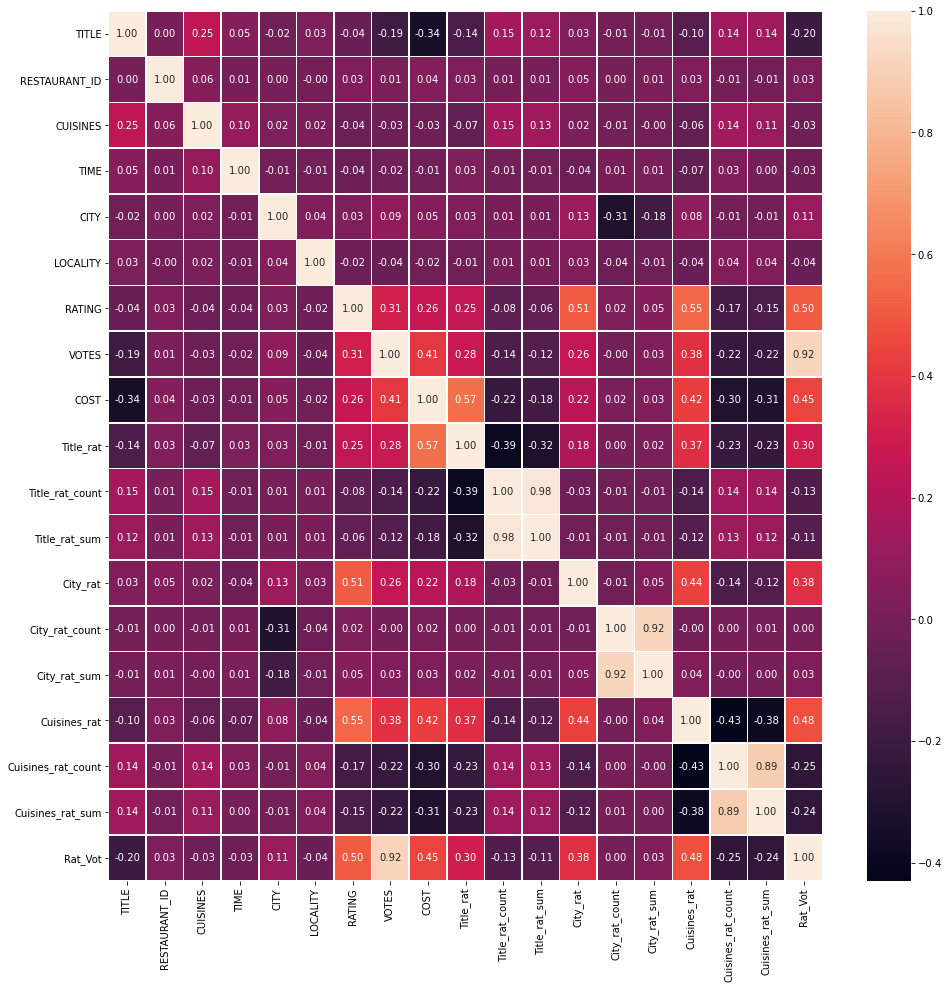

In [41]:

plt.figure(figsize = (16, 16))
sns.heatmap(Train.corr(),
           annot = True,
           fmt = '.2f',
           linewidth = .5);

## getting data ready for model

In [42]:
X = Train.drop('COST', axis = 1)
y = Train['COST']

sd = StandardScaler()
X_new = sd.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_new,
                                                     y,
                                                     test_size = 0.2)

## Building model

In [44]:
models = [LinearRegression(), SVR(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(model)
    print(r2_score(y_valid, y_pred))
    print('MAE :', mean_absolute_error(y_valid,y_pred ))
    print('MSE :', mean_squared_error(y_valid, y_pred))
    print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred)))
    print('\n')

LinearRegression()
0.4800504018807402
MAE : 6.369381655193127
MSE : 74.91894301701439
RMSE : 8.655572945623783


SVR()
0.573807981771371
MAE : 5.462912668356438
MSE : 61.40952054482274
RMSE : 7.836422687988617


Ridge()
0.48005127101157863
MAE : 6.36930946067294
MSE : 74.91881778494574
RMSE : 8.65556571143364


Lasso()
0.45417808219552624
MAE : 6.429001803974585
MSE : 78.64685597478137
RMSE : 8.868306263023474


DecisionTreeRegressor()
0.5522392358138096
MAE : 5.845941686367218
MSE : 64.5173364854216
RMSE : 8.032268452026587


RandomForestRegressor()
0.777174379236415
MAE : 4.227738376674547
MSE : 32.10668888888889
RMSE : 5.666276457153224


AdaBoostRegressor()
0.5567651498348493
MAE : 6.428198644333703
MSE : 63.86520270963127
RMSE : 7.991570728563395


GradientBoostingRegressor()
0.7544578242632207
MAE : 4.483882066484682
MSE : 35.37989131800059
RMSE : 5.94809980733348


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytr

***Since `Random Forest Regressor` is performing well choosing that***

In [66]:
cv = KFold(n_splits = 5, shuffle = True)
params = {'max_features' : ['auto', 'sqrt', 'log2'],
         'min_samples_split' : np.linspace(0.1, 1.0, 10),
         'n_estimators' : [ 50, 100, 500],
         'max_depth' : [x for x in range(5, 10)]}

In [67]:
rfr_grid = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42),
                  param_grid = params,
                  cv = cv,
                  scoring = 'r2',
                  verbose = True)
rfr_grid.fit(X_train , y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed: 11.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [50, 100, 500]},
             scoring='r2', verbose=True)

In [70]:
y_pred_rfr = rfr_grid.predict(X_valid)
print('r2_score :', r2_score(y_valid, y_pred_rfr))
print('MAE :', mean_absolute_error(y_valid,y_pred_rfr ))
print('MSE :', mean_squared_error(y_valid, y_pred_rfr))
print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred_rfr)))

r2_score : 0.6204767169772123
MAE : 5.315293554669427
MSE : 54.68507585593465
RMSE : 7.394935825004477


In [71]:
# lets go with the model before hyperparameter tuning
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_r = rfr.predict(X_valid)

print('r2_score :', r2_score(y_valid, y_pred_r))
print('MAE :', mean_absolute_error(y_valid,y_pred_r ))
print('MSE :', mean_squared_error(y_valid, y_pred_r))
print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred_r)))

r2_score : 0.7750902464133925
MAE : 4.230606776989756
MSE : 32.40698920409771
RMSE : 5.69271369419697


## Testing on test data

In [81]:
test = sd.fit_transform(Test)
predict = rfr.predict(test)
predictions = pd.DataFrame(predict, columns = ['COST'])
predictions.to_csv('Predictions.csv')

# Saving Model

In [82]:
import joblib
joblib.dump(rfr, 'Predicting_food_cost.pkl')

['Predicting_food_cost.pkl']